In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import shutil
import random
import sys
import time

In [18]:
path_probs_5000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_5000.csv' 
path_probs_15000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_15000.csv' 
path_probs_30000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_30000.csv' 
path_probs_40000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_40000.csv' 
path_probs_50000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_50000.csv' 
path_probs_63000='/content/drive/MyDrive/Colab Notebooks/NLP_Data/songs_and_probabilities_bert_V3_63000.csv' 


path_lyrics_processed='/content/drive/MyDrive/Colab Notebooks/NLP_Data/bert_preprocessed_songs.csv'

In [ ]:
df_lyrics = pd.read_csv(path_lyrics_processed)
df_probs_5000 = pd.read_csv(path_probs_5000)
df_probs_15000 = pd.read_csv(path_probs_15000)
df_probs_30000 = pd.read_csv(path_probs_30000)
df_probs_40000 = pd.read_csv(path_probs_40000)
df_probs_50000 = pd.read_csv(path_probs_50000)
df_probs_63000 = pd.read_csv(path_probs_63000)


df_probs_63000.head(10)


In [ ]:

duplicates = df_lyrics.duplicated(subset='lyrics', keep=False)

if duplicates.any():
    
    df_lyrics= df_lyrics.sort_values('year').drop_duplicates(subset='lyrics', keep='first')

    df_lyrics = df_lyrics.reset_index(drop=True)

    print("Duplicates removed")
else:
    print("No duplicates found")



df_lyrics.head()

In [ ]:
df_probs_combined = pd.concat([df_probs_5000, df_probs_15000, df_probs_30000, df_probs_40000, df_probs_50000, df_probs_63000]) 

df_probs_combined.head()

In [ ]:
# Joining with lyrics metadata
merged_df = pd.merge(df_lyrics, df_probs_combined, left_on='lyrics', right_on='Lyric')
merged_df.head()

In [ ]:
# Sort by probability
merged_df = merged_df.sort_values(by='Max Probability', ascending=False)

merged_df.head(15)

In [ ]:
import matplotlib.pyplot as plt

# Filter on threshold
filtered_df = merged_df[merged_df['Max Probability'] > 0.9]
filtered_df= filtered_df.sort_values(by='Max Probability', ascending=True)

filtered_df.head(10)


In [36]:
# Define the ranges for binning
bins = [0, 0.5, 0.9, 1]

merged_df['Probability Range'] = pd.cut(merged_df['Max Probability'], bins)

#Value counts for each range
value_counts = merged_df['Probability Range'].value_counts()


sorted_counts = value_counts.sort_index()
print(sorted_counts)


(0.0, 0.5]    60016
(0.5, 0.9]     1662
(0.9, 1.0]     1200
Name: Probability Range, dtype: int64


In [42]:
# Group the data by genre and count the occurrences of LGBTQ-phobia predictions
genre_counts = merged_df['tag'].value_counts()
grouped_genre= filtered_df.groupby('tag').size()

# Calculate the relative count by dividing the count of LGBTQ-phobia predictions by the total count for each genre
relative_counts = grouped_genre / genre_counts * 100  # Multiply by 100 for percentage values

print(relative_counts)

country    0.748621
pop        1.659000
rap        2.970639
rb         2.236890
rock       1.458610
dtype: float64


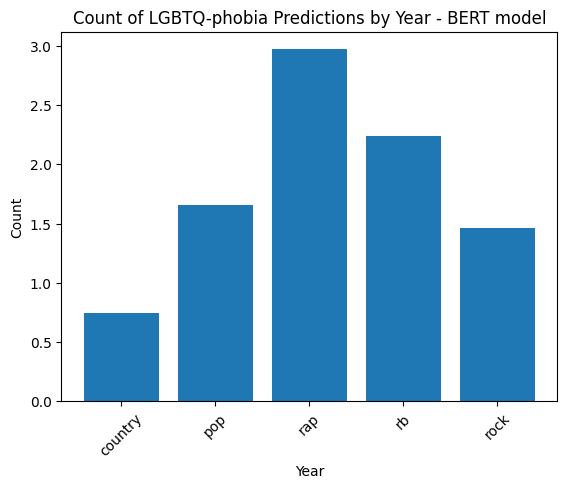

In [43]:
# Calculate the total count of songs for each genre
genre_counts = merged_df['tag'].value_counts()

# Group the data by genre and count the occurrences of LGBTQ-phobia predictions
grouped_genre= filtered_df.groupby('tag').size()

# Calculate the relative count by dividing the count of LGBTQ-phobia predictions by the total count for each genre
relative_counts = grouped_genre / genre_counts * 100  # Multiply by 100 for percentage values

# Create the bar plot
plt.bar(relative_counts.index, relative_counts.values)

#grouped_year.plot(kind='bar')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of LGBTQ-phobia Predictions by Year - BERT model')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

#plt.xticks(range(0, len(grouped_year), 10))

# Display the plot
plt.show()


In [38]:
max_value = grouped_year.max()
max_year = grouped_year.idxmax()

# Find the minimum value and its corresponding year
min_value = grouped_year.min()
min_year = grouped_year.idxmin()


mean_value = grouped_year.mean()
print( mean_value)

# Print the results
print("Maximum value:", max_value)
print("Corresponding year:", max_year)
print("Minimum value:", min_value)
print("Corresponding year:", min_year)

19.047619047619047
Maximum value: 36
Corresponding year: 2011
Minimum value: 6
Corresponding year: 1977
